**Name:** Mahendra Pratap Singh | **Reg ID:**  GO_STP_7372 | **Intern at:** Goeduhub Technologies | **Exploratory Data Analysis**

#### Exploratory Data Analysis (EDA) of Titanic Survival Problem

1. To do the same we will use the Pandas, Seaborn and Matplotlib library.
2. Dataset contains the details of the passengers who had boarded the ship
3. Dataset can be downloaded from Kaggle.

#### Importing the Required Libraries

In [93]:
from pandas import*
import pandas as pd
from numpy import*
import numpy as np
import matplotlib.pyplot as plt
from seaborn import*
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression




# Set Matplotlib defaults
plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",
       titleweight="bold",titlesize=14,titlepad=10,)

#### Uploading the dataset

In [5]:
plt.style.use("seaborn-whitegrid")
data = read_csv('train.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Data exploration

In [8]:
data.shape

(891, 12)

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

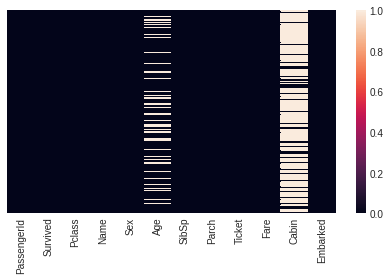

In [12]:
sns.heatmap(data.isnull(),yticklabels = False)

In [13]:
data = data.fillna(0)

<AxesSubplot:>

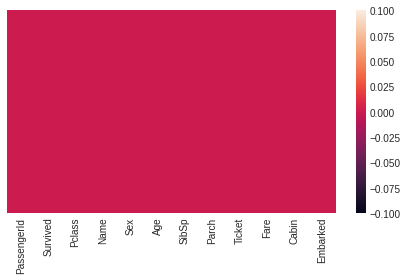

In [14]:
sns.heatmap(data.isnull(),yticklabels = False)

In [15]:
data.drop(columns='Name' , inplace=True)
data.drop(columns='Ticket' , inplace=True)

In [16]:
data.drop(columns = 'Embarked', inplace = True)

In [18]:
data.drop(columns = 'Cabin', inplace = True)

In [19]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833


In [20]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,23.799293,17.596074,0.0,6.0000,24.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


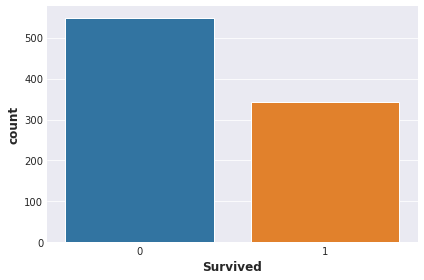

In [22]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = data)
plt.show()

In [23]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833


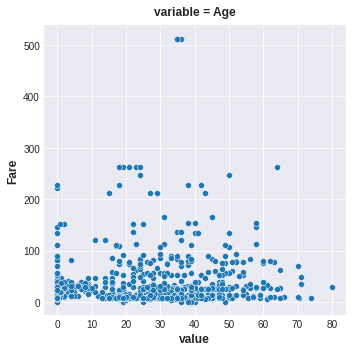

In [69]:
features = ["Age"]
sns.relplot(x="value", y="Fare", col="variable", 
            data=data.melt(id_vars="Fare", value_vars=features), facet_kws=dict(sharex=False),);

In [31]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833


In [62]:
dummise = get_dummies(data.Sex)
dummise.head(2)

,0,1
0,0,1
1,1,0


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

le = LabelEncoder()
newdf = data
newdf.Sex = le.fit_transform(newdf.Sex)
newdf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


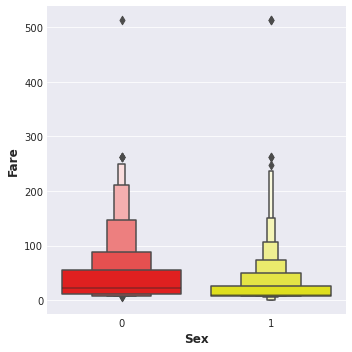

In [115]:
sns.catplot(x="Sex", y="Fare", data=newdf, kind="boxen");

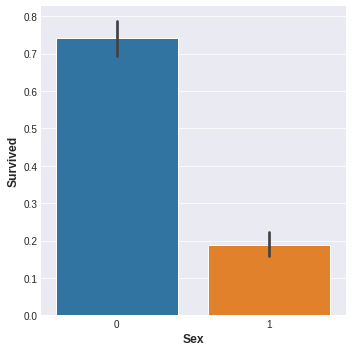

In [67]:
sns.catplot(x="Sex", y="Survived", data=newdf, kind="bar");

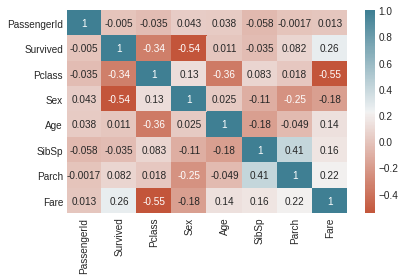

In [72]:
sns.heatmap(newdf.corr(),cmap=sns.diverging_palette (20, 220, n=200),annot=True)
plt.show()

#### Skewness

Skewness of age : 0.263


/home/m/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


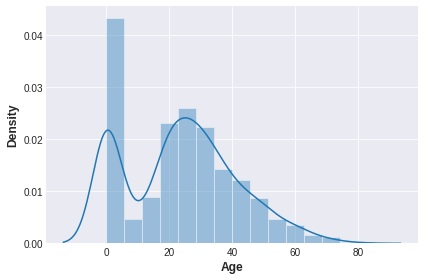

In [74]:
print('Skewness of age :',round(data['Age'].skew(),3))
sns.distplot(data['Age'])
plt.show()

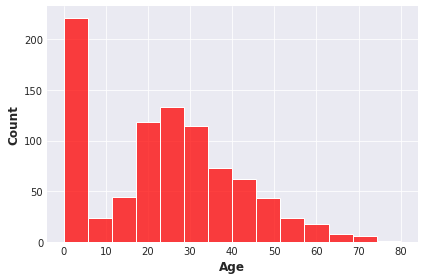

In [116]:
sns.histplot(data['Age'])
plt.show()

Survived : 0.479


/home/m/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


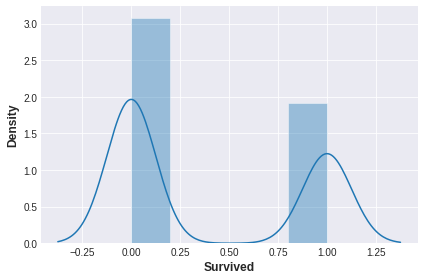

In [75]:
print('Survived :',round(data['Survived'].skew(),3))
sns.distplot(data['Survived'])
plt.show()

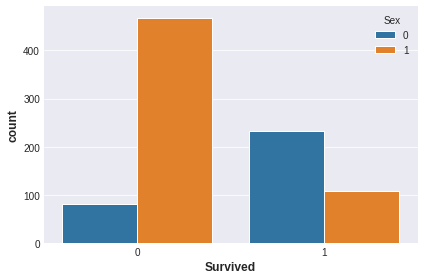

In [83]:
sns.countplot(x='Survived',hue='Sex',data=newdf)
plt.show()

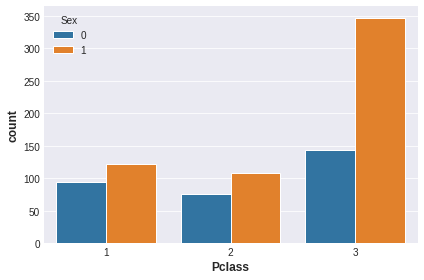

In [95]:
sns.countplot(x='Pclass',hue='Sex',data=data)
plt.show()

#### Bivariate Analysis

In [ ]:
# Analysing two varibles 2D scatter plot

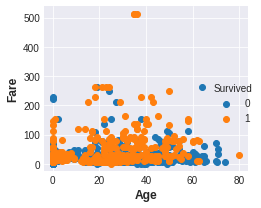

In [94]:
#sns.set_style('ticks', {"xtick.major.size": 8, "ytick.major.size": 8})
sns.FacetGrid(data,hue='Survived').map(plt.scatter,"Age","Fare").add_legend()
plt.show()

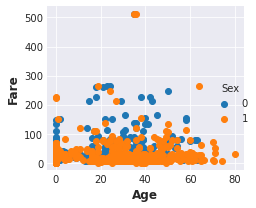

In [96]:
sns.set_style('darkgrid')
sns.FacetGrid(newdf,hue='Sex').map(plt.scatter,"Age","Fare").add_legend()
plt.show()

In [97]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833


In [98]:
newdf.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833


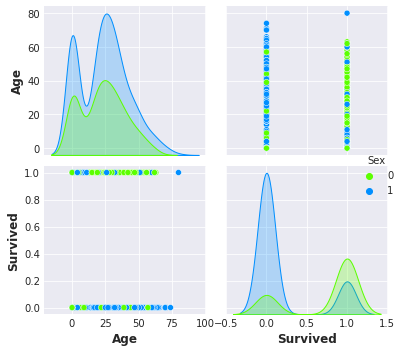

In [104]:
sns.pairplot(data,hue='Sex',vars=['Age','Survived'],palette = 'gist_rainbow')
plt.show()

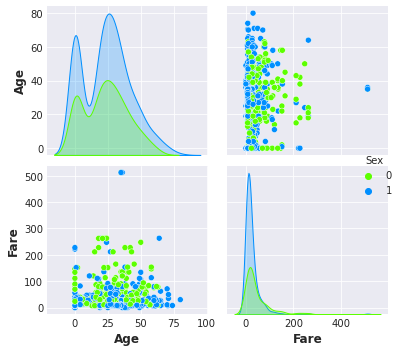

In [105]:
sns.pairplot(data,hue='Sex',vars=['Age','Fare'],palette = 'gist_rainbow')
plt.show()

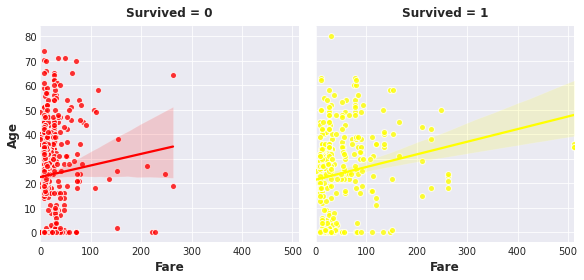

In [127]:
feature = "Fare"
sns.lmplot(x=feature, y="Age", hue="Survived", col="Survived",data=data, 
           scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,);

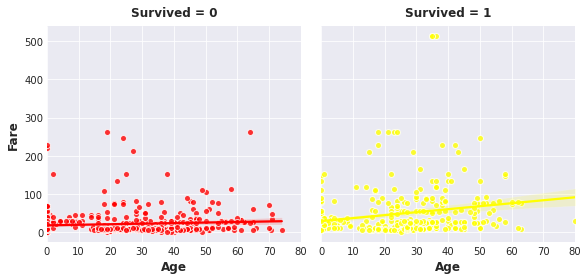

In [133]:
feature = "Age"
sns.lmplot(x=feature, y="Fare", hue="Survived", col="Survived",data=data, 
           scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,);

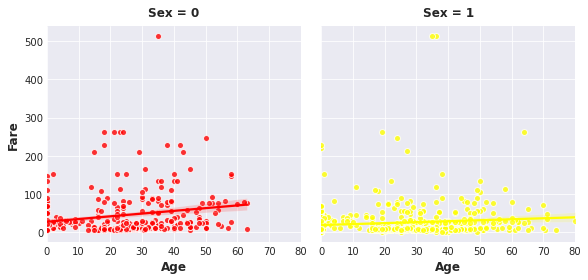

In [134]:
feature = "Age"
sns.lmplot(x=feature, y="Fare", hue="Sex", col="Sex",data=data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,);

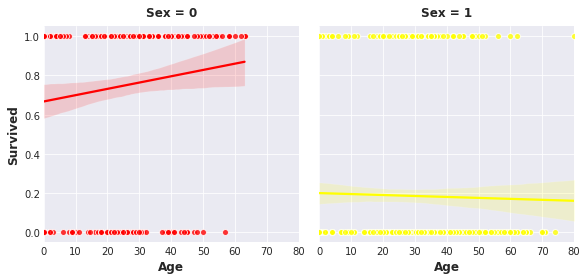

In [135]:
feature = "Age"
sns.lmplot(x=feature, y="Survived", hue="Sex", col="Sex",data=data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,);